© Валерий Студенников, курс "Инструменты анализа данных"

# Визуализация данных: matplotlib + plotly

matplitlib — библиотека Python-библиотека для визуализации данных

Материалы по визуализации данных:
* https://matplotlib.org/tutorials/introductory/sample_plots.html
* https://pyprog.pro/mpl/mpl_short_guide.html — отличное руководство!
* https://seaborn.pydata.org/tutorial/categorical.html
* https://habr.com/company/ods/blog/323210/
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html



In [9]:
import numpy as np
import pandas as pd

%pylab inline
#%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt

import seaborn as sns

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Populating the interactive namespace from numpy and matplotlib


## matplotlib и визуализация данных

* `matplotlib.pyplot` — высокоуровневая надстройка над matplotlib
* `matplotlib.pylab` — автоматически импортирует `pyplot` и `numpy`

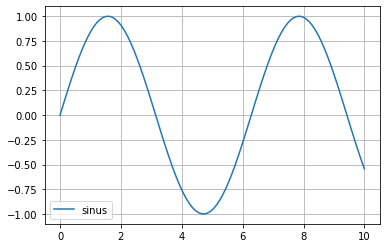

In [17]:
# Prepare the data
x = np.linspace(0, 10, 100)
# Plot the data
plt.plot( x, np.sin(x), label='sinus' )
# Add a legend
plt.legend()
plt.grid()
# Show the plot
#plt.show()

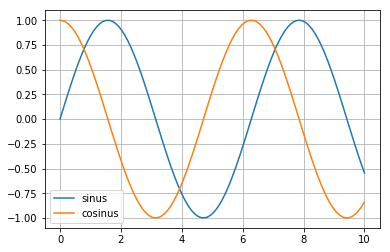

In [3]:
# можно на одном графике отобюразить несколько наборов данных
plt.plot( x, np.sin(x), label='sinus' )
plt.plot( x, np.cos(x), label='cosinus' )
plt.legend()
plt.grid()

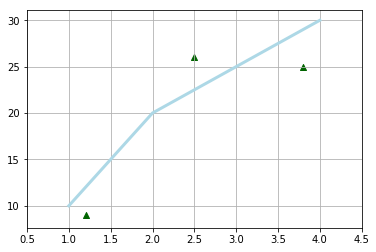

In [4]:
# Можно накладывать разные виды графиков
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.grid()
plt.show()

### Подграфики

Можно рисовать сразу несколько разных графиков на одном "полотне" / рисунке.

![](https://pyprog.pro/mpl/image/part_0/mpl_anatomy.jpg)

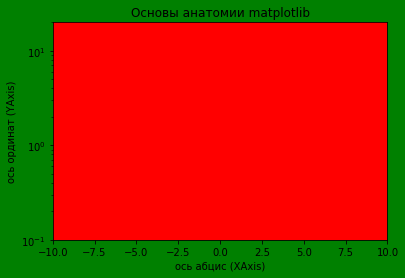

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.

fig.set_facecolor('green')

ax.set_facecolor('red')
ax.set_xlim([-10, 10])
ax.set_ylim([0.1, 20])
ax.set_yscale('log')
ax.set_title('Основы анатомии matplotlib')
ax.set_xlabel('ось абцис (XAxis)')
ax.set_ylabel('ось ординат (YAxis)')

plt.show()

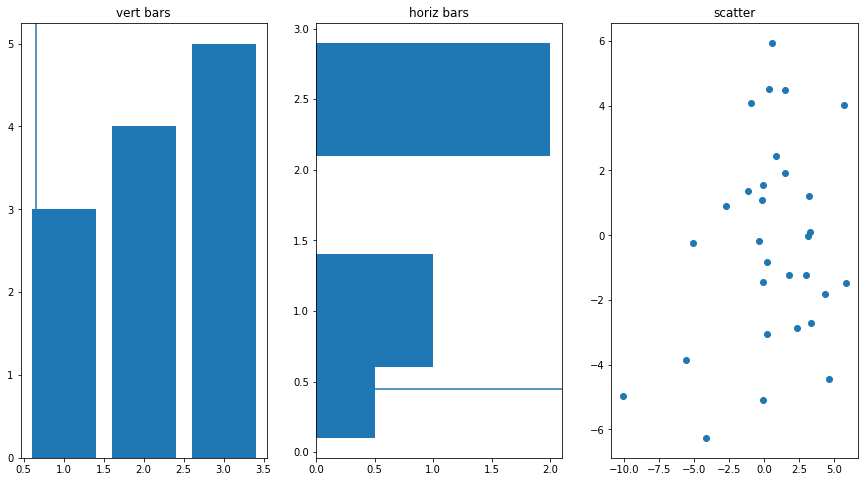

In [18]:
# Способ 1 — через .add_subplot

# Initialize the plot
fig = plt.figure( figsize=(15,8) )
ax1 = fig.add_subplot(131) # nrows, ncols, index, то же самое, что fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax1.axvline(0.65)
ax1.set_title('vert bars')

ax2.barh([0.5,1,2.5],[0.5,1,2])
ax2.set_title('horiz bars')
ax2.axhline(0.45)

ax3.scatter( np.random.randn(30) * 3, np.random.randn(30) * 3 )
ax3.set_title('scatter')

pass

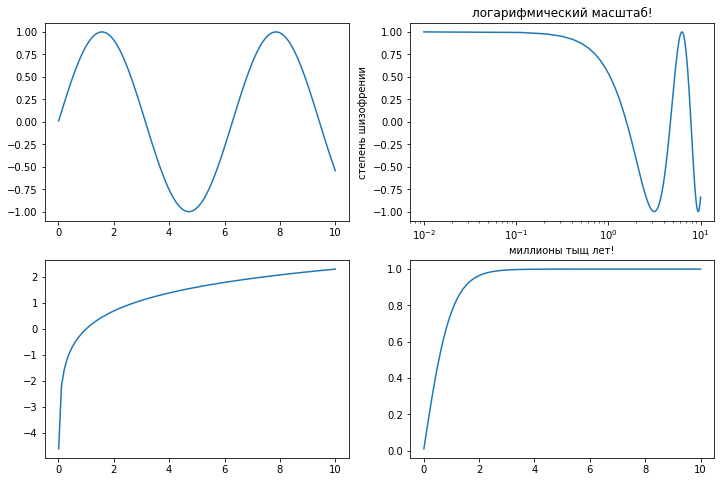

In [32]:
# Другой способ рисовать субграфики — .subplot

x = np.linspace(0.01, 10, 100)
pylab.figure(figsize=(12,8))

pylab.subplot(2,2,1)
plt.plot( x, np.sin(x) )

pylab.subplot(2,2,2)
plt.plot( x, np.cos(x), label='cosinus' )
plt.xscale('log') # логарифмическая шкала!
plt.title('логарифмический масштаб!')
plt.xlabel('миллионы тыщ лет!')
plt.ylabel('степень шизофрении')

pylab.subplot(2,2,3)
plt.plot( x, np.log(x) )

pylab.subplot(2,2,4)
plt.plot( x, np.tanh(x) )
pylab.show()

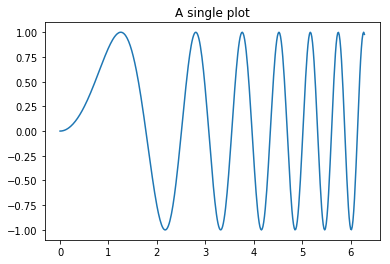

In [28]:
# Способ 3 — через .subplots

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

pass

Text(0.5, 1.0, 'negative')

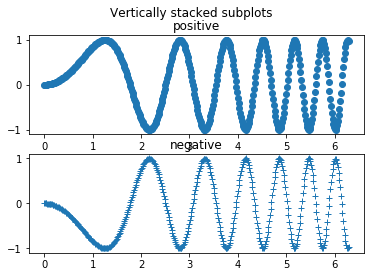

In [24]:
fig, axs = plt.subplots(2) # (nrows = 2, ncols = 1)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y, 'o')
axs[0].set_title('positive')
axs[1].plot(x, -y, '+')
axs[1].set_title('negative')

Примеры различных видов графиков:<br />
* https://matplotlib.org/tutorials/introductory/sample_plots.html
* https://matplotlib.org/2.0.2/examples/index.html

Небольшое руководство по pyplot:<br />
* https://matplotlib.org/tutorials/introductory/pyplot.html

Seaborn:<br />
* https://seaborn.pydata.org/index.html
* https://seaborn.pydata.org/generated/seaborn.pairplot.html

### Полезные виды графиков для анализа данных. Seaborn.

#### pairplot

In [5]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


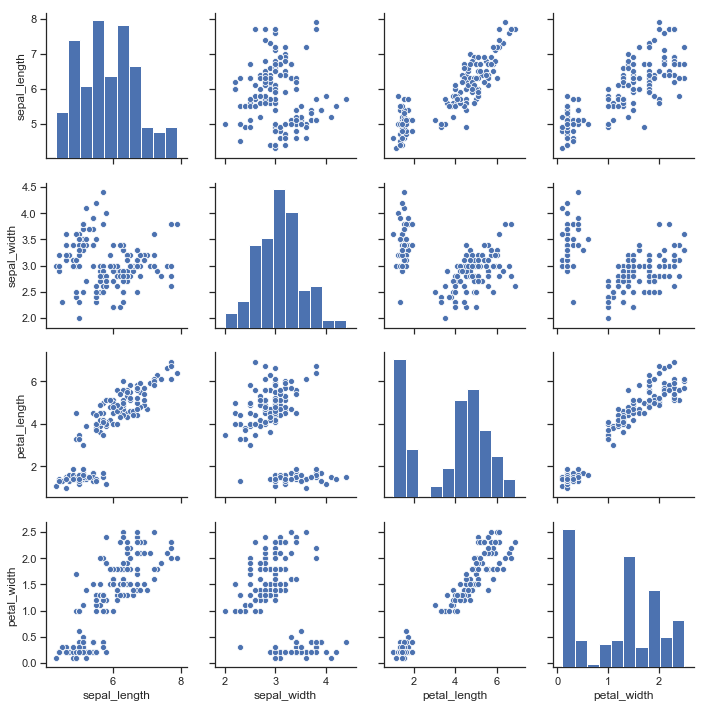

In [10]:
sns.set( style="ticks", color_codes=True )
g = sns.pairplot(iris)

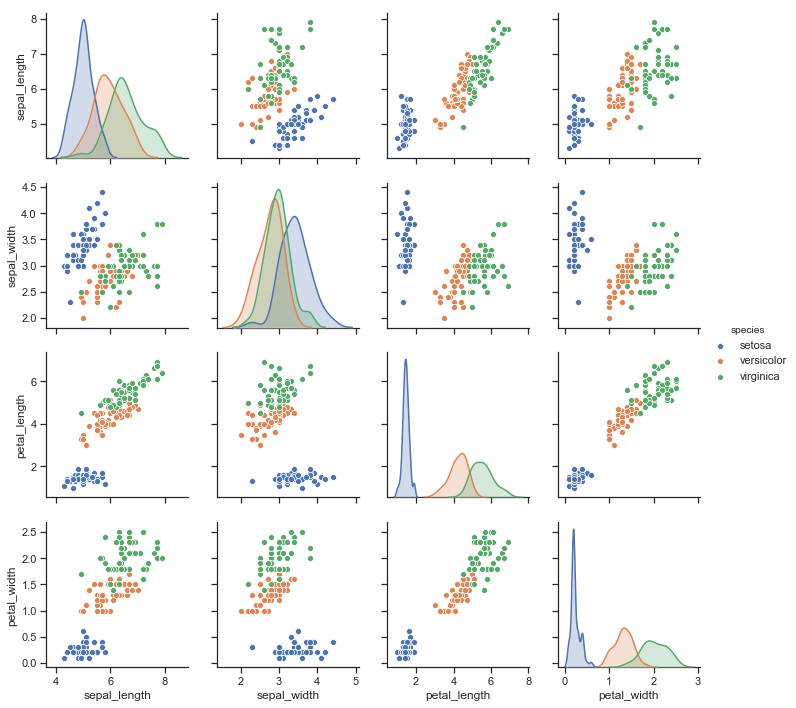

In [11]:
g = sns.pairplot(iris, hue="species", diag_kind = "kde")

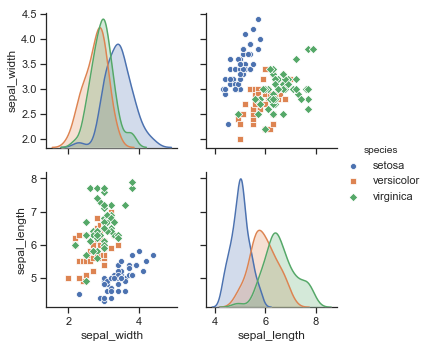

In [12]:
# Plot a subset of variables
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"], hue="species", markers=["o", "s", "D"])

In [13]:
import warnings
warnings.filterwarnings('ignore', '', FutureWarning)
warnings.filterwarnings('ignore', '', UserWarning)

#### .jointplot

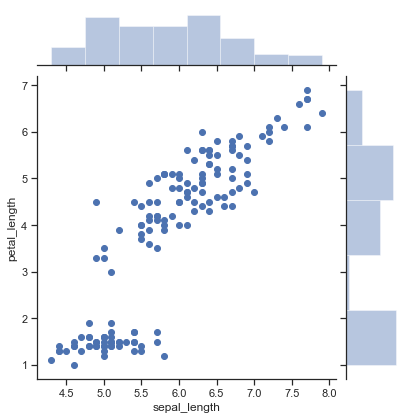

In [14]:
g = sns.jointplot( x = "sepal_length", y = "petal_length", data = iris )

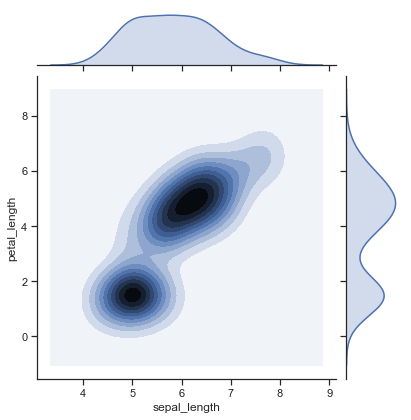

In [15]:
g = sns.jointplot( x = "sepal_length", y = "petal_length", data = iris, kind="kde" )

## Correlation plot (heatmap)

Построим карту попарной корелляции числовых признаков, отобразив степень корелляции на **тепловой карте**.

In [2]:
df_vgs = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')
#df_vgs.info()
df_vgs.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


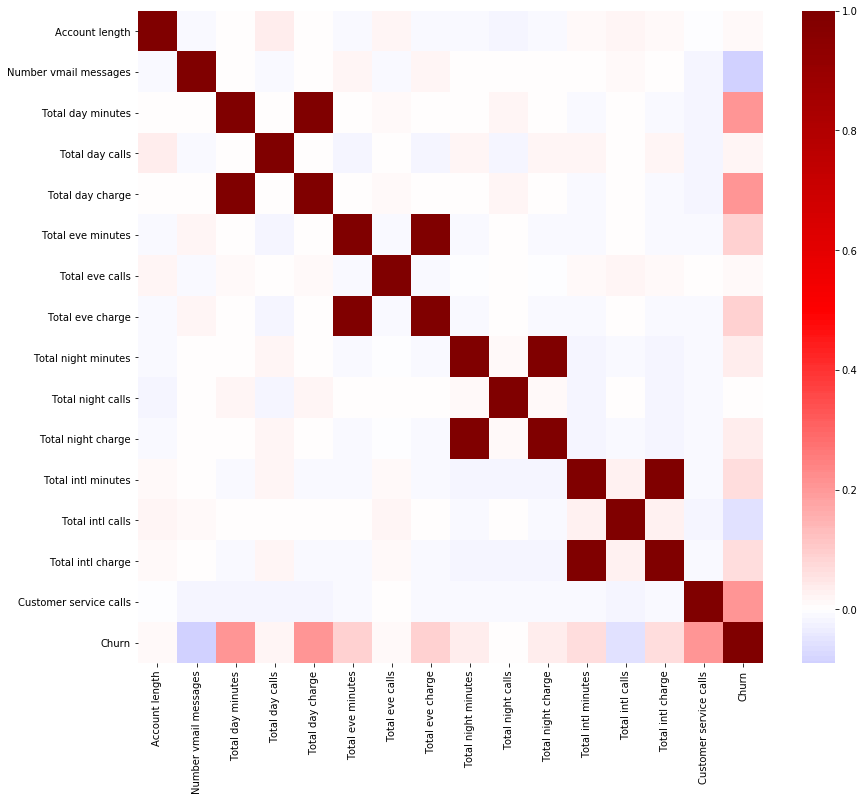

In [8]:
corr_matrix = df_vgs.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()

#fig, ax = plt.subplots(figsize=(14,12))
plt.figure(figsize = (14,12))
sns.heatmap( corr_matrix, cmap = 'seismic', center = 0 )
pass

![](https://i.stack.imgur.com/U5vKH.jpg)

### QQ-график

**Графики Q-Q** (квантиль-квантиль) сравнивают два распределения вероятностей путем построения совместных квантилей. График Q-Q используется для сравнения форм распределений, обеспечивая графическое представление того, насколько подобны или различны положение, масштаб и асимметрия двух распределений.

С помощью него определяем насколько числовой признак похож на нормальное распределение. Поскольку целый ряд методов статистики предполагают, что распределение признака нормальное. QQ-график — один из способов проверить нормальность распределения.

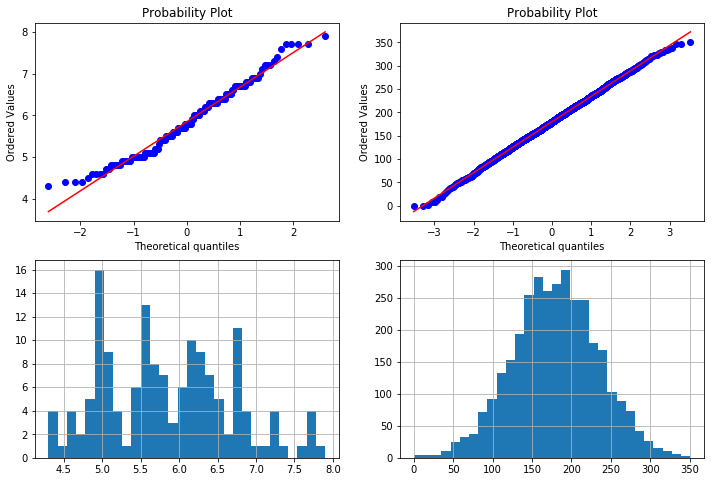

In [23]:
from scipy import stats

pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot( iris.sepal_length, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot( df_vgs['Total day minutes'], dist="norm", plot=pylab)
pylab.subplot(2,2,3)
iris.sepal_length.hist( bins = 30 )
pylab.subplot(2,2,4)
df_vgs['Total day minutes'].hist( bins = 30 )
pylab.show()

### Анализ с использованием категориальных переменных, boxplot и violin plot

Ящик с усами:
https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8

Ящик с усами, диаграмма размаха (англ. box-and-whiskers diagram or plot, box plot) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

In [18]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/598px-Boxplot_vs_PDF.svg.png" height="500">

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами. Наиболее распространённые значения, определяющие длину «усов»:

* Минимальное и максимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
* Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний. В общем виде эта формула имеет вид

$ X_{1}=Q_{1}-k(Q_{3}-Q_{1}) $

$ X_{2}=Q_{3}+k(Q_{3}-Q_{1}) $

где $ X_{1} $ — нижняя граница уса, $ X_{2} $ — верхняя граница уса, $ Q_{1} $ — первый квартиль, $ Q_{3} $ — третий квартиль, $ k $ — коэффициент, наиболее часто употребляемое значение которого равно 1.5.

* 9-й и 91-й процентили;
* 5-й и 95-й процентили;
* 2-й и 98-й процентили.

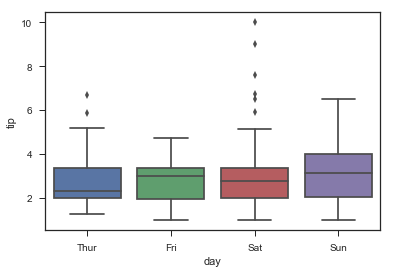

In [142]:
g = sns.boxplot(x="day", y="tip", data=tips)

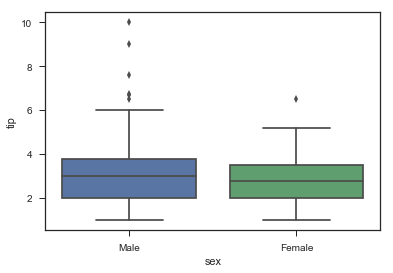

In [143]:
g = sns.boxplot(x="sex", y="tip", data=tips)

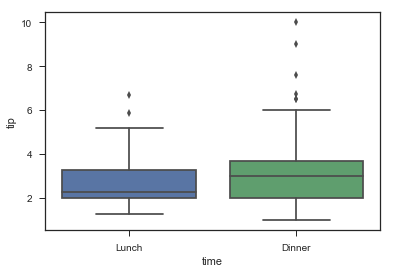

In [145]:
g = sns.boxplot(x="time", y="tip", data=tips)

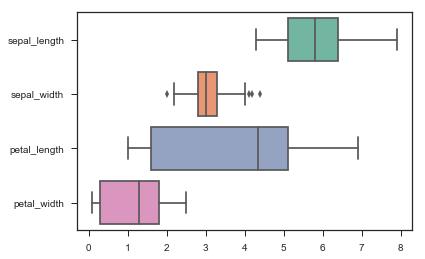

In [151]:
g = sns.boxplot( data=iris, orient="h", palette="Set2" )

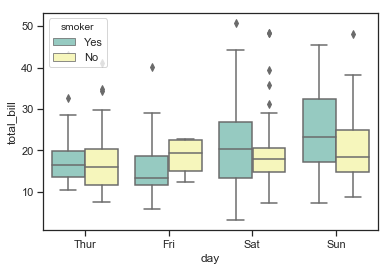

In [19]:
g = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

Если распределение не унимодальное — boxplot не слишком информативен. Попробуем Violin Plot

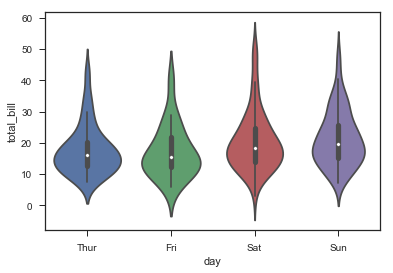

In [167]:
g = sns.violinplot(x="day", y="total_bill", data=tips)

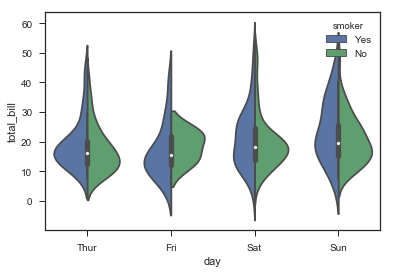

In [168]:
sns.violinplot( x="day", y="total_bill", hue="smoker", split=True, data=tips )

#### boxplot 1
<img src="https://image.ibb.co/nnGpSK/boxplot_1.jpg" alt="boxplot_1">

#### boxplot 2
<img src="https://image.ibb.co/bFPnEz/boxplot_2.jpg" alt="boxplot_2">

#### violinplot 1
<img src="https://image.ibb.co/czbOnK/volinplot_1.jpg" alt="volinplot_1">

#### violinplot 2
<img src="https://image.ibb.co/hSKb7K/violinplot_2.jpg" alt="violinplot_2">

#### violinplot 3
<img src="https://image.ibb.co/mCrpSK/violinplot_3.jpg" alt="violinplot_3">

## Встроенные возможности визуализации в pandas

Метод `plot` у `Series` и `DataFrame` — простая обёртка над `matplotlib.pyplot.plot()`

https://pandas.pydata.org/pandas-docs/stable/visualization.html

Поддерживаемые типы графиков:

|метод|DataFrame|Series|назначение|
|--|--|--|--|
plot         | + | + | Основной метод по умолчанию, разные типы графиков
plot.area    | + | + | график области
plot.bar     | + | + | столбчатая диаграмма
plot.barh	 | + | + | столбчатая диаграмма (горизонтальные бары)
box	         | + | + | boxplot
plot.density | + | + | График оценки плотности расспределения с гауссовым ядром
plot.kde     | + | + | График оценки плотности расспределения с гауссовым ядром
plot.hexbin | + |   | Generate a hexagonal binning plot.
plot.hist | + | + | Гистограмма
plot.line | + | + | Линейный график
plot.pie | + | + | "Пирог"
plot.scatter | + |   | Диаграмма рассеяния
boxplot |   | + | Boxplot
hist | + | + | Гистограмма

### .plot

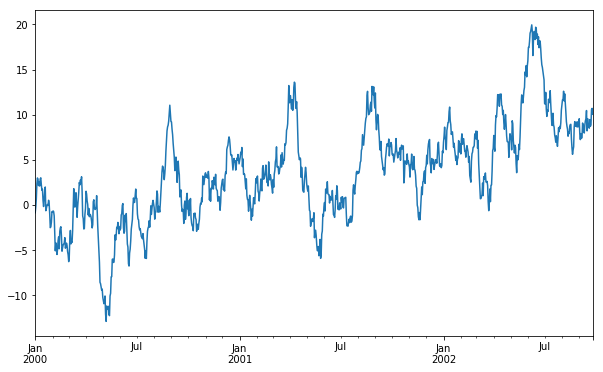

In [39]:
# Series.plot

ts = pd.Series(np.random.randn(1000), index=pd.date_range('2000-01-01', periods=1000))
ts = ts.cumsum()
p = ts.plot( figsize = (10, 6) )

Временно́й ряд (time series) — собранный в разные моменты времени статистический материал о значении каких-либо параметров исследуемого процесса. Каждая единица статистического материала называется измерением или отсчётом, также допустимо называть его уровнем на указанный с ним момент времени.

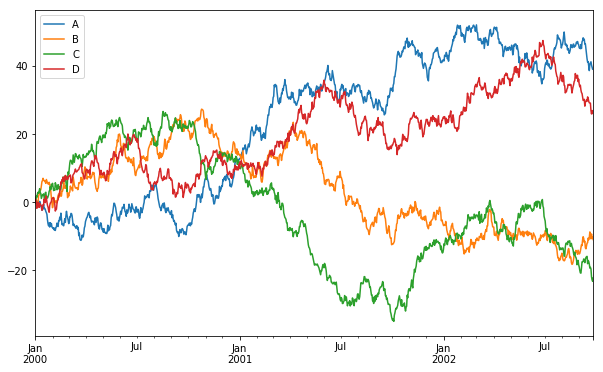

In [61]:
# DataFrame.plot() — по умолчанию отрисует все колонки с легендой
df4 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df4 = df4.cumsum()
p = df4.plot( figsize = (10, 6) )

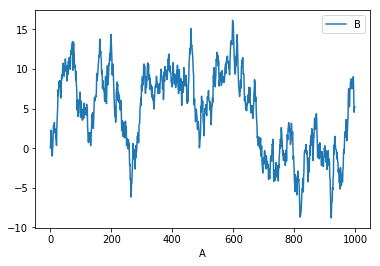

In [41]:
# Можно явно задать колонки которые будут использоваться для координат x и y
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
p = df3.plot( x = 'A', y = 'B' )

### .bar / .barh

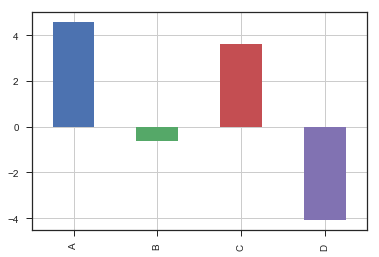

In [193]:
# bar chart
g = df.iloc[5].plot( kind='bar' )
g.grid()

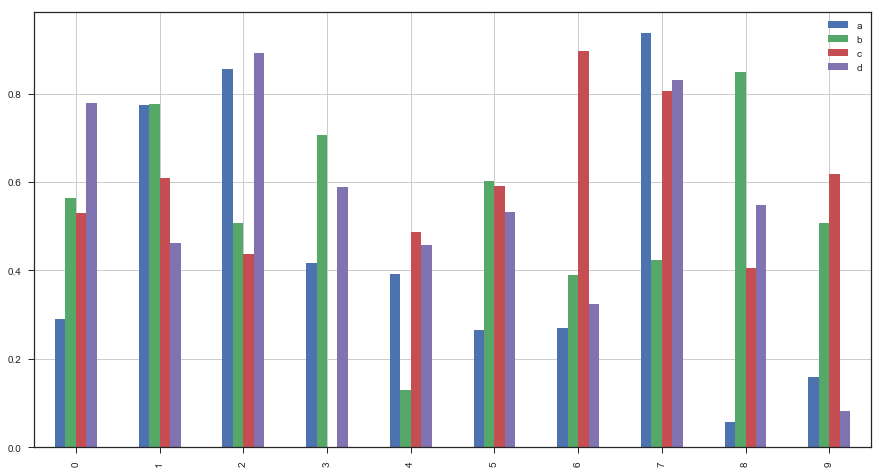

In [195]:
# множественные столбчатые диаграммы
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
g = df2.plot.bar( figsize= (15,8)  )
g.grid()

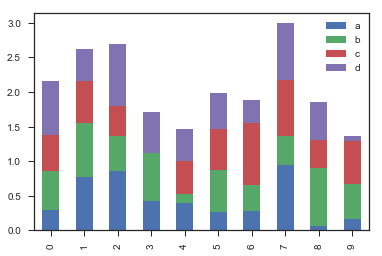

In [197]:
# stacked bar plot
g = df2.plot.bar( stacked=True )

### .hist

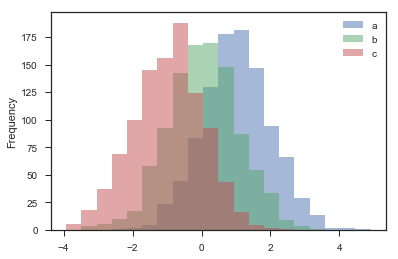

In [199]:
# гистограммы

df4 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1},
                   columns=['a', 'b', 'c']) 

g = df4.plot.hist( alpha=0.5, bins = 20 )

### .scatter

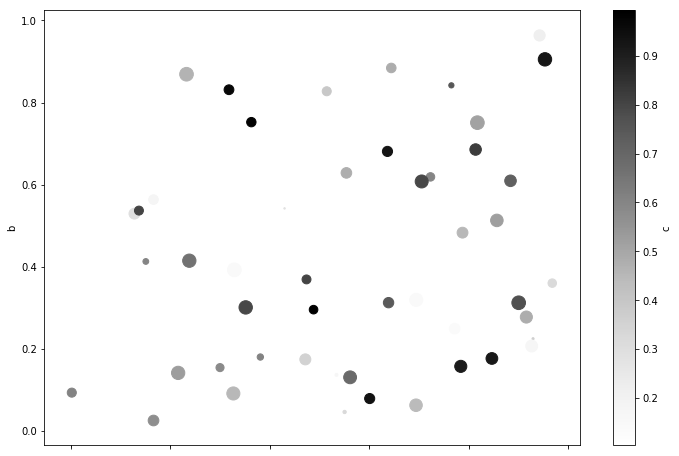

In [9]:
# Scatter Plot
df = pd.DataFrame( np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'] )
g = df.plot.scatter( x = 'a', y = 'b', c = 'c', s = df['d']*200, figsize = (12, 8) )

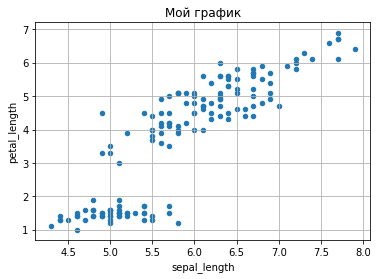

In [38]:
ax = iris.plot.scatter( x = 'sepal_length', y = 'petal_length', title = 'Мой график' )
ax.grid()

### .plot.box

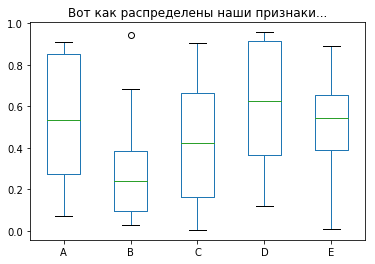

In [45]:
dft = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
dft.plot.box( title = 'Вот как распределены наши признаки...' )
pass

### .boxplot

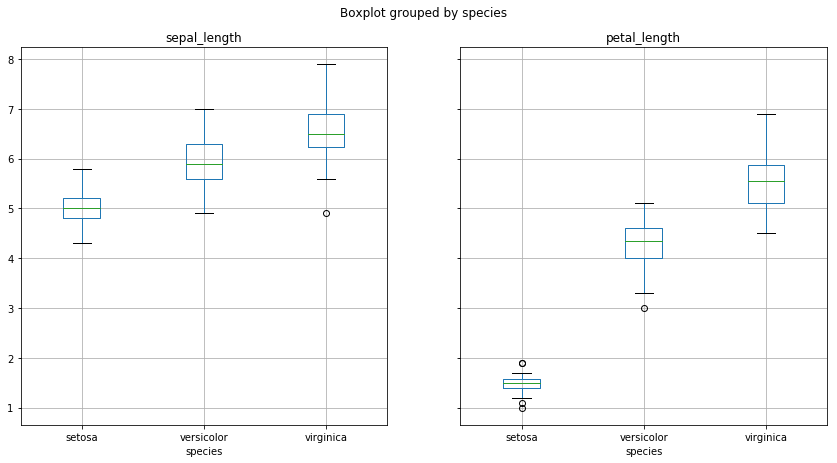

In [70]:
iris.boxplot( by = 'species', figsize=(14, 7), column = ['sepal_length', 'petal_length'] )
pass

### .scatter_matrix

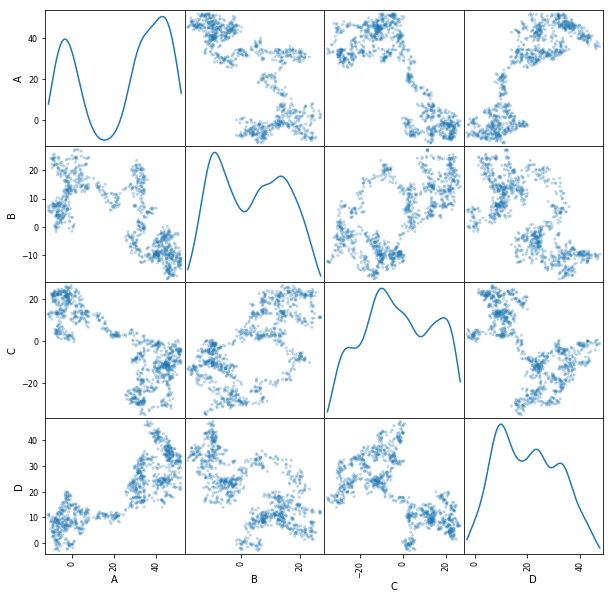

In [64]:
from pandas.plotting import scatter_matrix

#df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df4, alpha=0.3, figsize=(10, 10), diagonal='kde')
pass